In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
my_data_dir = "C:\\Users\\Rohan\\Downloads\\face_data"

In [3]:
os.listdir(my_data_dir)

['test', 'train']

In [4]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [5]:
os.listdir(train_path)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
os.listdir(train_path+'\\happy')[0]

'Training_10019449.jpg'

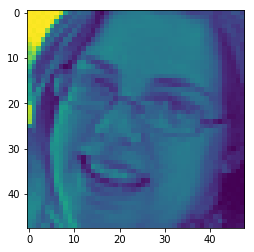

In [7]:
happy_face = train_path+'\\happy'+'\\Training_10019449.jpg'
happy_img= imread(happy_face)
plt.imshow(happy_img)

In [8]:
os.listdir(train_path+'\\disgust')[0]

'Training_10371709.jpg'

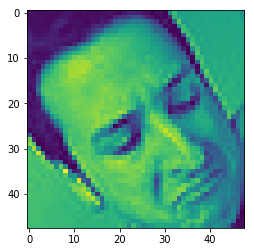

In [9]:
disgust_face = train_path+'\\disgust'+'\\Training_10371709.jpg'
disgust_img= imread(disgust_face)
plt.imshow(disgust_img)

In [10]:
os.listdir(train_path+'\\sad')[0]

'Training_10022789.jpg'

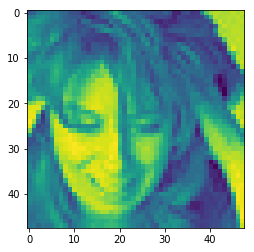

In [11]:
sad_face = train_path+'\\sad'+'\\Training_10022789.jpg'
sad_img= imread(sad_face)
plt.imshow(sad_img)

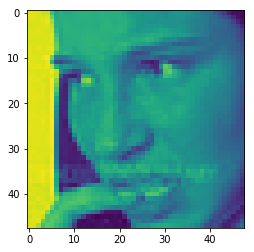

In [12]:
fear_face_path = train_path+'\\fear\\'+os.listdir(train_path+'\\fear')[0]
fear_face = imread(fear_face_path)
plt.imshow(fear_face)

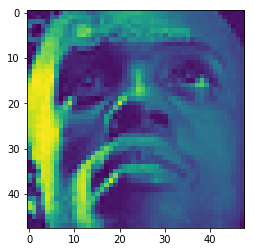

In [13]:
neutral_face_path = train_path+'\\neutral\\'+os.listdir(train_path+'\\neutral')[0]
neutral_face = imread(neutral_face_path)
plt.imshow(neutral_face)

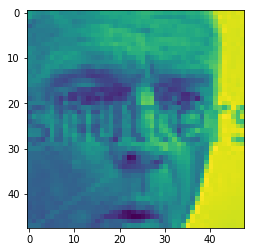

In [14]:
surprise_face_path = train_path+'\\surprise\\'+os.listdir(train_path+'\\surprise')[0]
surprise_face = imread(surprise_face_path)
plt.imshow(surprise_face)

In [15]:
print("For training data:")
print("happy: "+str(len(os.listdir(train_path+'\\happy'))))
print("angry: "+str(len(os.listdir(train_path+'\\angry'))))
print("sad: "+str(len(os.listdir(train_path+'\\sad'))))
print("disgust: "+str(len(os.listdir(train_path+'\\disgust'))))
print("neutral: "+str(len(os.listdir(train_path+'\\neutral'))))
print("surprise: "+str(len(os.listdir(train_path+'\\surprise'))))
print("fear: "+str(len(os.listdir(train_path+'\\fear'))))

For training data:
happy: 7215
angry: 3995
sad: 4830
disgust: 436
neutral: 4965
surprise: 3171
fear: 4097


In [16]:
print("For test data:")
print("happy: "+str(len(os.listdir(test_path+'\\happy'))))
print("angry: "+str(len(os.listdir(test_path+'\\angry'))))
print("sad: "+str(len(os.listdir(test_path+'\\sad'))))
print("disgust: "+str(len(os.listdir(test_path+'\\disgust'))))
print("neutral: "+str(len(os.listdir(test_path+'\\neutral'))))
print("surprise: "+str(len(os.listdir(test_path+'\\surprise'))))
print("fear: "+str(len(os.listdir(test_path+'\\fear'))))

For test data:
happy: 1774
angry: 958
sad: 1247
disgust: 111
neutral: 1233
surprise: 831
fear: 1024


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

In [19]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True
)

Found 28709 images belonging to 7 classes.


In [21]:
validation_generator = val_datagen.flow_from_directory(
        test_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False
)

Found 7178 images belonging to 7 classes.


In [22]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [23]:
img_size = 48
batch_size = 64

In [35]:
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [34]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [36]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf

In [38]:
epochs = 25
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

In [39]:
checkpoint = ModelCheckpoint('emotionmodel_weights.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_weights_only=True,
                             verbose=1)

In [40]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

In [41]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=3,
                              min_lr=0.00001,
                              mode='auto')

In [42]:
callbacks = [PlotLossesCallback(),checkpoint,reduce_lr]

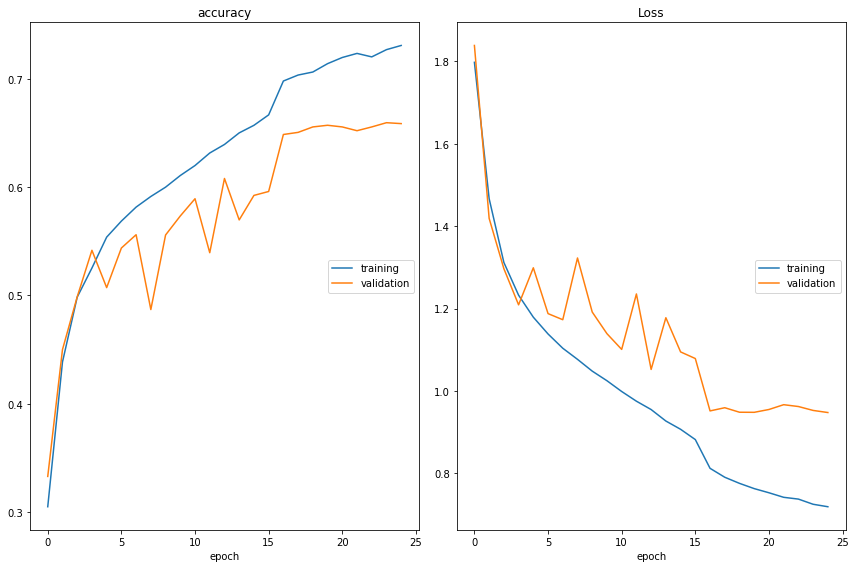

accuracy
	training         	 (min:    0.305, max:    0.731, cur:    0.731)
	validation       	 (min:    0.333, max:    0.659, cur:    0.659)
Loss
	training         	 (min:    0.719, max:    1.797, cur:    0.719)
	validation       	 (min:    0.948, max:    1.838, cur:    0.948)

Epoch 00025: saving model to emotionmodel_weights.h5
448/448 [==============================] - 1258s 3s/step - loss: 0.7192 - accuracy: 0.7307 - val_loss: 0.9478 - val_accuracy: 0.6586


In [43]:
history=model.fit(
                train_generator,
                steps_per_epoch=steps_per_epoch,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=validation_steps)

In [44]:
from tensorflow.keras.models import load_model
model.save('model_weight.h5')

In [45]:
model.save_weights('model_weight.h5')

In [46]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)